In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0) # one type of iris

per_clf = Perceptron(random_state=42)
per_clf.fit(X,y)

X_new = [[2,0.5], [3,1]]
y_pred = per_clf.predict(X_new)

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [4]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target,
                                                             random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, 
                                                      y_train_full, 
                                                      random_state=42)

In [5]:
type(housing)

sklearn.utils._bunch.Bunch

In [6]:
# regression
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)

0.0
0.13157894736842105


/Users/aina/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/aina/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


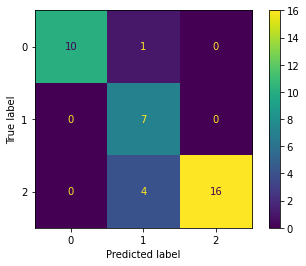

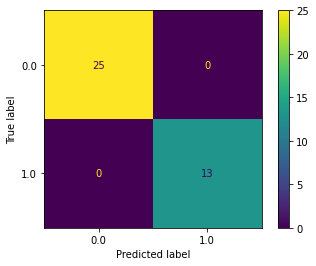

In [7]:
# multilabel binary classification -> iris
from sklearn.neural_network import MLPClassifier

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)

X_train, X_valid, y_train, y_valid = train_test_split(X, y)

mlp_multi_label = MLPClassifier(hidden_layer_sizes=[10],
                              activation = 'relu',
                              solver = 'adam', 
                              random_state=42)

pipeline_multilabel = make_pipeline(StandardScaler(), mlp_multi_label)
pipeline_multilabel.fit(X_train, y_train)
y_pred_ml = pipeline_multilabel.predict(X_valid)
print(mean_squared_error(y_pred_ml, y_valid))

# multiclass
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y = iris.target

X_train, X_valid, y_train_mc, y_valid_mc = train_test_split(X, y)
mlp_multi_class = MLPClassifier(hidden_layer_sizes=[10],
                              activation = 'relu',
                              solver = 'adam',
                              random_state=42)


pipeline_multiclass = make_pipeline(StandardScaler(), mlp_multi_class)
pipeline_multiclass.fit(X_train, y_train_mc)
y_pred_mc = pipeline_multiclass.predict(X_valid)
print(mean_squared_error(y_pred_mc, y_valid_mc))


ConfusionMatrixDisplay.from_predictions(y_pred_mc, y_valid_mc)
ConfusionMatrixDisplay.from_predictions(y_pred_ml, y_valid)

In [46]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [9]:
X_train.shape

(55000, 28, 28)

In [10]:
X_train.dtype

dtype('uint8')

In [47]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Ankle boot


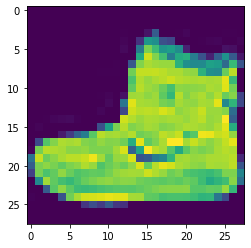

In [13]:
print(class_names[y_train[0]])

ax = plt.imshow(X_train[0])
ax.title = class_names[y_train[0]]



In [14]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

2023-02-19 09:20:29.000948: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.layers

In [18]:
weights, biases = model.layers[1].get_weights()
print(weights.shape, biases.shape)

(784, 300) (300,)


In [19]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'sgd',
             metrics = ["accuracy"])

In [20]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7156 - accuracy: 0.7613 - val_loss: 0.5030 - val_accuracy: 0.8302
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4865 - accuracy: 0.8315 - val_loss: 0.4616 - val_accuracy: 0.8360
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4396 - accuracy: 0.8450 - val_loss: 0.4209 - val_accuracy: 0.8542
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4139 - accuracy: 0.8549 - val_loss: 0.3947 - val_accuracy: 0.8602
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3931 - accuracy: 0.8622 - val_loss: 0.3874 - val_accuracy: 0.8612
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3772 - accuracy: 0.8677 - val_loss: 0.3921 - val_accuracy: 0.8622
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3652 - accuracy: 0.8706 - val_loss: 0.3690 - val_accuracy:

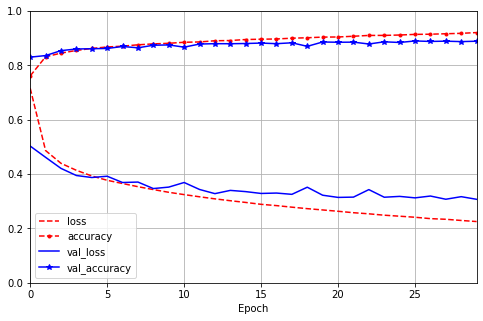

In [21]:
import pandas as pd
pd.DataFrame(history.history).plot(
    figsize=(8,5), xlim=[0,29], ylim=[0,1], grid=True, xlabel='Epoch',
    style=["r--", "r--.", "b-", "b-*"]
    )
plt.show()

In [22]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3262 - accuracy: 0.8854


[0.32616522908210754, 0.8853999972343445]

In [23]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 85ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [24]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [25]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

array([9, 2, 1], dtype=uint8)

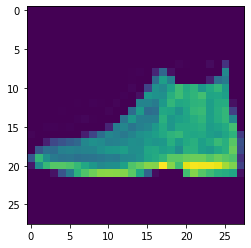

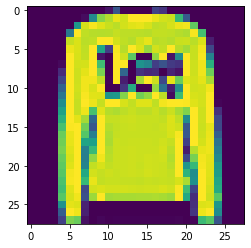

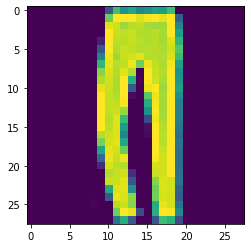

In [26]:
for i in range(0,3):
    plt.figure()
    plt.imshow(X_test[i])
y_test[:3]

In [67]:
# Building a regression MLP using the sequential API
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import tensorflow as tf

housing = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42)

print(X_train.shape)

tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
                            ])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss='mse', metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)


(11610, 8)


In [28]:
history = model.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_val, y_val))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9530 - root_mean_squared_error: 0.9762 - val_loss: 0.4201 - val_root_mean_squared_error: 0.6481
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3920 - root_mean_squared_error: 0.6261 - val_loss: 0.9657 - val_root_mean_squared_error: 0.9827
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3604 - root_mean_squared_error: 0.6003 - val_loss: 0.3191 - val_root_mean_squared_error: 0.5649
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3418 - root_mean_squared_error: 0.5846 - val_loss: 0.5328 - val_root_mean_squared_error: 0.7299
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3294 - root_mean_squared_error: 0.5739 - val_loss: 0.5154 - val_root_mean_squared_error: 0.7179
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3192 - root_mean_squared_error: 0.5650 - val_loss: 0.3055 - val_

In [29]:
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 62ms/step


In [74]:
# Building Complex Models Using the Functional API
# non-sequential so we can't use the sequential api 
import tensorflow as tf

# Import Data
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)


#Build network 1 
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation='relu')
hidden_layer2 = tf.keras.layers.Dense(30, activation='relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [75]:
#make specific features go thrpugh the dense layer 

#Build network 2 - with wide and deep specified features
input_wide = tf.keras.layers.Input(shape=[5], name="input_wide") #features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6], name="input_deep") #features 2 to 7

In [88]:
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation='relu')
hidden_layer2 = tf.keras.layers.Dense(30, activation='relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1, name="output")

norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = hidden_layer1(norm_deep)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([norm_wide, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [89]:

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

X_train_d = {"input_wide": X_train_wide, "input_deep": X_train_deep}
X_valid_d = {"input_wide": X_valid_wide, "input_deep": X_valid_deep}
X_test_d = {"input_wide": X_test_wide, "input_deep": X_test_deep}

history = model.fit(X_train_d, y_train, epochs=20,
                    validation_data=(X_valid_d, y_valid))
mse_test = model.evaluate(X_test_d, y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.2095 - root_mean_squared_error: 1.0998 - val_loss: 0.5678 - val_root_mean_squared_error: 0.7535
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4818 - root_mean_squared_error: 0.6941 - val_loss: 0.6268 - val_root_mean_squared_error: 0.7917
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4268 - root_mean_squared_error: 0.6533 - val_loss: 0.5767 - val_root_mean_squared_error: 0.7594
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4064 - root_mean_squared_error: 0.6375 - val_loss: 0.8982 - val_root_mean_squared_error: 0.9477
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3902 - root_mean_squared_error: 0.6246 - val_loss: 0.8390 - val_root_mean_squared_error: 0.9160
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3845 - root_mean_squared_error: 0.6201 - val_loss: 0.6777 - val_

In [94]:
# Building an auxiliary output
output = tf.keras.layers.Dense(1, name="output")(concat)
aux_output = tf.keras.layers.Dense(1, name="aux_output")(hidden2)

loss_d={"output": "mse", "aux_output": "mse"}

model = tf.keras.Model(inputs=[input_wide, input_deep], 
                     outputs=[output, aux_output])

In [95]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=loss_d, loss_weights=(0.9, 0.1),
              optimizer=optimizer, metrics=['RootMeanSquaredError'])

In [96]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

y_train_d = {"output": y_train, "aux_output": y_train}

history = model.fit(
    X_train_d, y_train_d, epochs=20, 
    validation_data=(X_train_d, y_train_d)
)

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.0468 - output_loss: 0.9521 - aux_output_loss: 1.8989 - output_root_mean_squared_error: 0.9758 - aux_output_root_mean_squared_error: 1.3780 - val_loss: 0.5120 - val_output_loss: 0.4949 - val_aux_output_loss: 0.6665 - val_output_root_mean_squared_error: 0.7035 - val_aux_output_root_mean_squared_error: 0.8164
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4565 - output_loss: 0.4470 - aux_output_loss: 0.5420 - output_root_mean_squared_error: 0.6686 - aux_output_root_mean_squared_error: 0.7362 - val_loss: 0.4190 - val_output_loss: 0.4130 - val_aux_output_loss: 0.4731 - val_output_root_mean_squared_error: 0.6426 - val_aux_output_root_mean_squared_error: 0.6878
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3943 - output_loss: 0.3874 - aux_output_loss: 0.4561 - output_root_mean_squared_error: 0.6225 - aux_output_root_mean_squared_error: 0.6753 - val_loss: 0.373

In [98]:
y_test_d = {"output": y_test, "aux_output": y_test}

eval_results = model.evaluate(X_test_d, y_test_d)
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

162/162 [==============================] - 0s 1ms/step - loss: 0.3236 - output_loss: 0.3183 - aux_output_loss: 0.3706 - output_root_mean_squared_error: 0.5642 - aux_output_root_mean_squared_error: 0.6088


In [99]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 [==============================] - 0s 76ms/step


In [100]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))

1/1 [==============================] - 0s 24ms/step
